# Predicting heart disease using machine learning

This notebook looks into using various python-based learning and data science libraries in as attempt to build a machine learning capable of predicting whether or not someone has heart disease based on their medical attributes.

we are going to take the folloe=wing approach:
1. Problem definition
2. data
3. Evaluation
4. Features 
5. Modelling
6. Experimentation

## 1.  Problem defination

In a statement,
> Given clinical parameters about a patient, can whether or not they have heart disease.


## 2. Data

The origional data come from the cleavland data from the learning respository.
http://archive.ics.edu/ml/datasets/heart+Disease

There is also a version of it available on Kaggle.

https://www.kaggle.com/ronitf/heart-disease-uci


* Always see important attributes from the given data and select only those which will be useful. 
* The origional heart disease dataset contains 76 attributes. but, only 14 are silected. We should understand meaning and dependency of attributes on each other.
3. Get all data in useful format.

## 3. Evaluation

> If we can reach 95% accuracy at predicting whether or not a patient has heart disease during the proof of concept, we all pursue the project.
* Always decide desired accuracy hoe severity of the model.(or customer requirement)

## 4. Features
**Create data dictionary**
This is where you will get different information about each of the features in your data. You can do this via doing own research (such as looking at the links above) or by talking to a subject matter expert( Someone who knows about the dataset).

Crete data dictionary
```
1. age - age in years
2. sex - (1 = male; 0 = female)
3. cp - chest pain type
4. trestbps - resting blood pressure (in mm Hg on admission to the hospital)
4. chol - serum cholestoral in mg/dl
5. fbs - (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
6. restecg - resting electrocardiographic results
7. thalach - maximum heart rate achieved
8. exang - exercise induced angina (1 = yes; 0 = no)
9. oldpeak - ST depression induced by exercise relative to rest
10. slope - the slope of the peak exercise ST segment
11. ca - number of major vessels (0-3) colored by flourosopy
12. thal - 3 = normal; 6 = fixed defect; 7 = reversable defect
13. target - 1 or 0
```

###  Preparing the tools

we are going to use pandas, matplotlib and NumPy for data analysis and manipulation.

In [1]:
# Import all tools we need 
# Regular EDA(Exploratory data analysis)
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 
# Models from Scikit-learn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Moel Evaluation
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import plot_roc_curve

### LOAD DATA

In [2]:
df = pd.read_csv("heart_disease.csv")
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


### Data Exploration(Exploratory data analysis or EDA)

the goal here is to find out more about the data and become a subject matter expert on the dataset you are working with.
 1. What questions are you trying to solve?
 2. What kind of data so we have and how so we trear different types?
 3. What is missing from the data and how do you deal with it?
 4. Where are the outliers and why should you care about them?
 5. How can you add, change or remove features to get more out of your data?

In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [5]:
df["target"].value_counts()

1    165
0    138
Name: target, dtype: int64

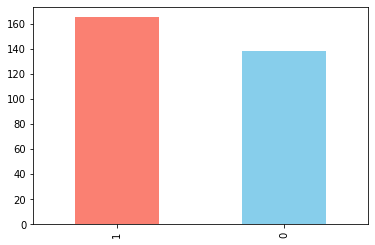

In [6]:
df["target"].value_counts().plot(kind="bar", color=["salmon", "skyblue"])

#### Visualizing the counts of 0 and 1 are nearly equal. so, problem is balanced classification problem.

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [8]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [9]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


### Heart disease frequency according to sex

In [10]:
df.sex.value_counts()

1    207
0     96
Name: sex, dtype: int64

In [11]:
# Compare Sex Vs Target
pd.crosstab(df.target, df.sex)

sex,0,1
target,,
0,24,114
1,72,93


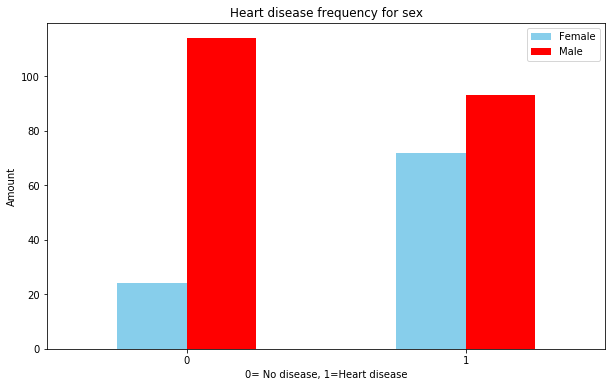

In [12]:
pd.crosstab(df.target, df.sex).plot(kind="bar",
                                   figsize=(10,6),
                                   color=["skyblue", "red"])
plt.title("Heart disease frequency for sex")
plt.xlabel("0= No disease, 1=Heart disease")
plt.ylabel("Amount")
plt.legend(["Female", "Male"])
plt.xticks(rotation=0);

In [13]:
df["thalach"].value_counts()

162    11
160     9
163     9
173     8
152     8
       ..
129     1
128     1
127     1
124     1
71      1
Name: thalach, Length: 91, dtype: int64

### Age Vs.thalach for heart rate


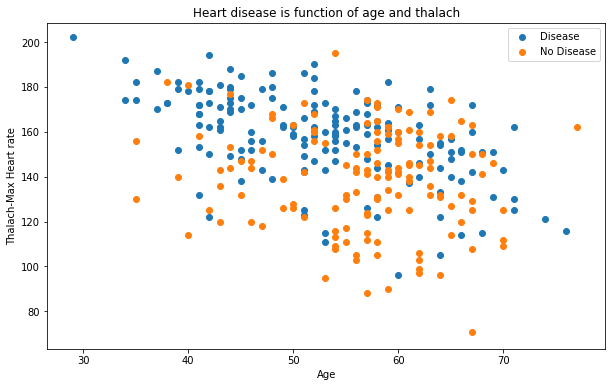

In [14]:
# Create another figure
plt.figure(figsize=(10,6))

#scatter with positive example
plt.scatter(df.age[df.target==1],
           df.thalach[df.target==1])
#scatter with negative example
plt.scatter(df.age[df.target==0],
           df.thalach[df.target==0])

plt.title("Heart disease is function of age and thalach")
plt.xlabel("Age")
plt.ylabel("Thalach-Max Heart rate")
plt.legend(["Disease", "No Disease"])

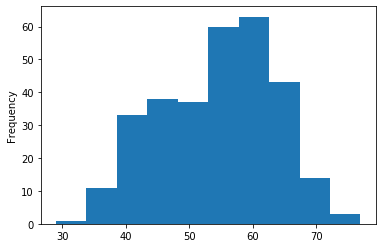

In [15]:
# Check the disttribution of the age column with a histogram
df.age.plot.hist();

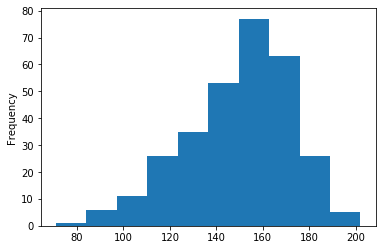

In [16]:
df.thalach.plot.hist();

In [17]:
pd.crosstab(df.cp, df.target)

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


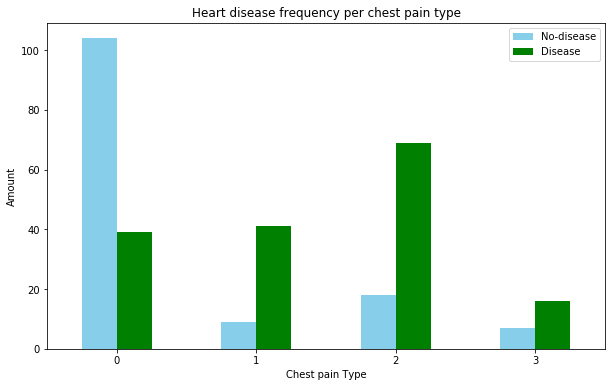

In [18]:
pd.crosstab(df.cp, df.target).plot(kind="bar",
                                  figsize=(10,6),
                                  color=["skyblue", "green"])
plt.title("Heart disease frequency per chest pain type")
plt.xlabel("Chest pain Type")
plt.ylabel("Amount")
plt.legend(["No-disease", "Disease"])
plt.xticks(rotation=0);

In [19]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [20]:
# Make a correlation matrix
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


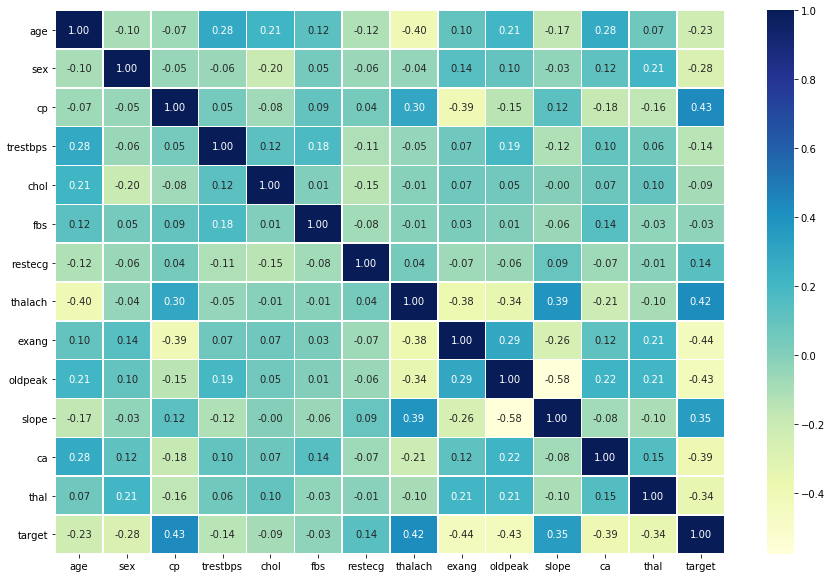

In [21]:
# Let's make correlation matrix more visiable
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize=(15,10))
ax = sns.heatmap(corr_matrix,
                annot=True,
                linewidths=0.5,
                fmt=".2f",
                cmap="YlGnBu")

## 5. Modelling

In [22]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [23]:
#Spliting the data
x= df.drop("target", axis=1)
y= df["target"]

In [24]:
y


0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

In [25]:
x.shape, y.shape

((303, 13), (303,))

In [26]:
np.random.seed(55)
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2)

In [27]:
x_train.shape, x_test.shape

((242, 13), (61, 13))

Now we've split into training and test set, time to choose right estimator. we'll train it on training set and test it on test set.

We're going to try three different ML models:

1. Logistic Regression
2. K-Nearest neighbours classifier
3. Random Forest Classifier

*Logistic regression. despites its name, is a linear model for classification rather than regression.It is also known as th eliterature as logit regression, maximum-entropy classification or log-linear classifier.

In [28]:
# Put models in a dictionary

models = {"Logistic Regression": LogisticRegression(),
         "KNN": KNeighborsClassifier(),
         "Random Forest": RandomForestClassifier()}

#Create a function to fit and score  models
def fit_and_scores (models, x_train, x_test, y_train, y_test):
    """
    Fits and evaluate given machine learning models.
    models: a dict of different Scikit-Learn machine learning models
    x_train : training data(no labels)
    x_test : testing data(no lebels)
    y_train : traning labels
    y_test : testing labels
    """
    
    np.random.seed(55)
    model_scores = {}
    
    for name, model in models.items():
        model.fit(x_train, y_train)
        model_scores[name] = model.score(x_test, y_test)
        
    return model_scores

In [29]:
model_scores = fit_and_scores(models=models,
                           x_train=x_train,
                           x_test=x_test,
                           y_train= y_train,
                           y_test = y_test)
model_scores

C:\Users\suhas\AI\Project2\env\lib\site-packages\sklearn\linear_model\_logistic.py:938: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Logistic Regression': 0.8360655737704918,
 'KNN': 0.7377049180327869,
 'Random Forest': 0.8032786885245902}

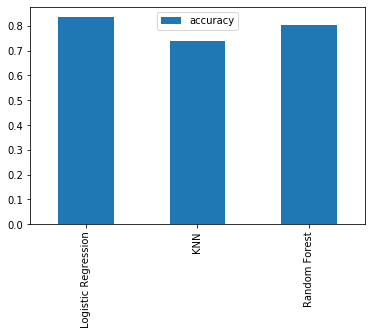

In [30]:
# Model Comparisons
model_compare = pd.DataFrame(model_scores, index=["accuracy"])
model_compare.T.plot.bar();

now we have a baseline model. and we know a model's first predictions arent always what we should our next steps off. What should do??

Let's look at the following:
 1. Hyperparameter tuning
 2. Feature importance
 3. Confusion matrix
 4. Cross-validation
 5. Precision
 6. Recall
 7. F1 score
 8. Classification report
 9. ROC Curve
 10. Area under the curve (AUC)

## Hyperparameter tuning

In [31]:
# Let's tune KNN
train_scores = []
test_scores =[]

# create a list of range of neighbours
neighbors = range(1,21)

# Setup KNN instance
knn = KNeighborsClassifier()

# Loops throught defferent neighbors
for i in neighbors :
    knn.set_params(n_neighbors=i)
    knn.fit(x_train, y_train)
    train_scores.append(knn.score(x_train, y_train))
    test_scores.append(knn.score(x_test, y_test))

In [32]:
train_scores


[1.0,
 0.7975206611570248,
 0.7727272727272727,
 0.7479338842975206,
 0.7603305785123967,
 0.7603305785123967,
 0.743801652892562,
 0.743801652892562,
 0.7396694214876033,
 0.7107438016528925,
 0.7024793388429752,
 0.7148760330578512,
 0.6859504132231405,
 0.7148760330578512,
 0.6900826446280992,
 0.7024793388429752,
 0.6776859504132231,
 0.6776859504132231,
 0.6818181818181818,
 0.6900826446280992]

In [33]:
test_scores

[0.6885245901639344,
 0.6229508196721312,
 0.6721311475409836,
 0.6885245901639344,
 0.7377049180327869,
 0.6885245901639344,
 0.7213114754098361,
 0.7049180327868853,
 0.6885245901639344,
 0.6885245901639344,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.6885245901639344,
 0.7213114754098361,
 0.6721311475409836,
 0.7213114754098361,
 0.7049180327868853,
 0.7213114754098361,
 0.7213114754098361]

Maximum KNN score on the test data:73.77%


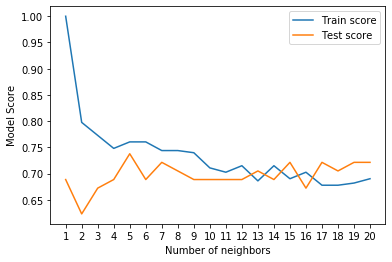

In [34]:
plt.plot(neighbors, train_scores, label="Train score")
plt.plot(neighbors, test_scores, label="Test score")
plt.xticks(np.arange(1,21,1))
plt.xlabel("Number of neighbors")
plt.ylabel("Model Score")
plt.legend()
print(f"Maximum KNN score on the test data:{max(test_scores)*100:.2f}%")

### Hyperparameter tuning by RandomizedSearchCV

We are going to  tune:

* LogisticRegression()
* RandomForestClassifier()

... using RandomizedSearchCV

In [46]:
# Create a hyperparameter grid for logistic regression

log_reg_grid ={"C": np.logspace(-4, 4, 20),
              "solver" : ["liblinear"]} 
# Create a hyperparameter grid for RandomForestClassifier

rf_grid = {"n_estimators":np.arange(10, 1000, 50),
          "max_depth": [None, 3, 5, 10],
          "min_samples_split": np.arange(2, 20, 2),
          "min_samples_leaf" : np.arange(1, 20, 2)}

now we've got hyperparameter grid setup for each of our models, let's tune them using RandomizedSearchCV

In [47]:
#Tune LogisticRegression
np.random.seed(77)

# Setup random hyperparameter search for LogisticRegression
rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                               param_distributions=log_reg_grid,
                               cv=5,
                               n_iter = 20,
                               verbose =True)

#Fit the model
rs_log_reg.fit(x_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.7s finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=LogisticRegression(C=1.0, class_weight=None,
                                                dual=False, fit_intercept=True,
                                                intercept_scaling=1,
                                                l1_ratio=None, max_iter=100,
                                                multi_class='auto', n_jobs=None,
                                                penalty='l2', random_state=None,
                                                solver='lbfgs', tol=0.0001,
                                                verbose=0, warm_start=False),
                   iid='deprecated', n_iter=20, n_jobs=None,
                   param_distributions={'C':...
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+0

In [48]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 0.08858667904100823}

In [49]:
rs_log_reg.score(x_test, y_test)

0.8032786885245902

Now we've tuned LogisticRegression, let's do it for the RandomForestClassifier()..

In [50]:
#Tune LogisticRegression
np.random.seed(77)

# Setup random hyperparameter search for LogisticRegression
rs_rf = RandomizedSearchCV(RandomForestClassifier(),
                               param_distributions= rf_grid,
                               cv=5,
                               n_iter = 20,
                               verbose =True)

#Fit the model
rs_rf.fit(x_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:  2.5min finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

In [51]:
# Find the best hyperparameters
rs_rf.best_params_

{'n_estimators': 360,
 'min_samples_split': 18,
 'min_samples_leaf': 1,
 'max_depth': None}

In [53]:
#Evaluate the RandomizedSearch RandomForestClassifier

rs_rf.score(x_test, y_test)

0.8360655737704918

## Hyperparameter Tuning with GridSearchCV
since LogisticRegression model provides the best scores so far, we'll try and improve them again using GridSearchCV

In [58]:
#Different Hyperparameters for logisticRegression
log_reg_grid = { "C": np.logspace(-4, 4, 30),
               "solver": ["liblinear"]}

# setup grid hyperparameters search for LogisticRegression
gs_log_reg = GridSearchCV(LogisticRegression(),
                         param_grid =log_reg_grid,
                         cv=5,
                         verbose=True)

# Fit the hyperparameter search model
gs_log_reg.fit(x_train, y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    1.6s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': array([1.00000000e-04, 1.8...
       2.04335972e-01, 3.85662042e-01, 7.27895384e-01, 1.37382380e+00,
       2.59294380e+00, 4.89390092e+00, 9.23670857e+00, 1.74332882e+01,
       3.29034456e+01, 6.21016942e+01, 1.17210230e+02, 2.21221629e+02,
       4.17531894e+02, 7.88046282e+02, 1.48735211e+03, 2.80721620e+03,
       5

In [59]:
# Chech the best hyperparameter
gs_log_reg.best_params_


{'C': 0.1082636733874054, 'solver': 'liblinear'}

In [60]:
# Evaluate th escore
gs_log_reg.score(x_test, y_test)

0.8032786885245902

In [61]:
model_scores

{'Logistic Regression': 0.8360655737704918,
 'KNN': 0.7377049180327869,
 'Random Forest': 0.8032786885245902}

## Evaluating Our tunes machine learning classifier, beyond accuracy

* ROC Curve and AUC score
* Confusion Matrix
* Classification report
* Precision
* Recall
* F1

... and it would be great if cross validation was used where possible.

to make comparisons and evaluate our trained model, first we need to make predictions.

In [62]:
# Make predictions with tuned model
y_preds = gs_log_reg.predict(x_test)

In [63]:
y_preds

array([1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1], dtype=int64)

In [64]:
y_test

92     1
121    1
53     1
70     1
250    0
      ..
124    1
256    0
265    0
113    1
185    0
Name: target, Length: 61, dtype: int64

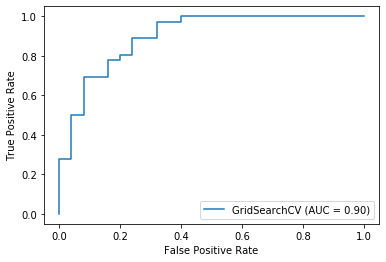

In [65]:
# Plot ROC curve and calculate AUC
plot_roc_curve(gs_log_reg, x_test, y_test)

In [67]:
# Confusion Matrix
print(confusion_matrix(y_test, y_preds))

[[17  8]
 [ 4 32]]


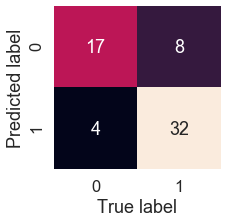

In [69]:
sns.set(font_scale=1.5)

def plot_conf_mat(y_test, y_preds):
    """
    Plots a nice looking confusion matrix using Seaborn's heatmap()
    """
    
    fig, ax = plt.subplots(figsize=(3,3))
    ax = sns.heatmap(confusion_matrix(y_test, y_preds),
                    annot =True,
                    cbar=False)
    plt.xlabel("True label")
    plt.ylabel("Predicted label")
    
plot_conf_mat(y_test, y_preds)

now we've got a ROC curve, AUC metric and a confusion matrix, let's get a classification report, cross validated precision, recall and f1 score.


In [72]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.81      0.68      0.74        25
           1       0.80      0.89      0.84        36

    accuracy                           0.80        61
   macro avg       0.80      0.78      0.79        61
weighted avg       0.80      0.80      0.80        61



### Calculate evaluation metrics using cross validation

we're goint to calculate accuracy, precision, recall and f1 score of our model using cross -validation and to do so we'll be using `cross_cal_score()`


In [73]:
# Chech best hyperparameters
gs_log_reg.best_params_

{'C': 0.1082636733874054, 'solver': 'liblinear'}

In [74]:
# Create a new classifier with best parameters
clf = LogisticRegression(C=0.1082636733874054, solver="liblinear")



In [76]:
# accuracy
cv_acc = cross_val_score(clf, x,y, cv=5, scoring="accuracy")
cv_acc.mean()

0.834808743169399

In [78]:
# Preciaon
cv_precision = cross_val_score(clf, x,y, cv=5, scoring="precision")
cv_precision.mean()

0.8182683982683983

In [79]:
# Recall
cv_recall = cross_val_score(clf, x,y, cv=5, scoring="recall")
cv_recall.mean()


0.9030303030303031

In [80]:
cv_f1 = cross_val_score(clf, x,y, cv=5, scoring="f1")
cv_f1.mean()

0.8572876223964057

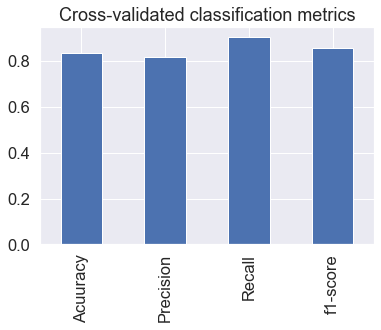

In [91]:
# Visualize cross-validated metrics
cv_metrics = pd.DataFrame({"Acuuracy": cv_acc.mean(),
                           "Precision": cv_precision.mean(),
                           "Recall": cv_recall.mean(),
                           "f1-score":cv_f1.mean()},
                         index=[0])
cv_metrics.T.plot.bar(title = "Cross-validated classification metrics", legend=False)

### Feature Importance

Feature importance is another as asking, "Which feature contributed most to the outcomes of the model and how did they contributed?"

Finding feature importance is different for the each machine learning model. One way to find feature importance is ti search for (MODEL NAME) feture importance in google.

Let's find feature importance for our linear regression model.

In [93]:
# Fit an instance of LogisticRegression
clf = LogisticRegression(C=0.1082636733874054, solver="liblinear")

clf.fit(x_train, y_train);

In [96]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [94]:
# Check coef_
clf.coef_   #found after research

array([[ 0.01384033, -0.64080406,  0.60775315, -0.01685947, -0.00562062,
        -0.07481902,  0.19251575,  0.03056174, -0.39713818, -0.44676097,
         0.21185815, -0.52018241, -0.5375065 ]])

In [97]:
# Match coef_ to features to coloms
feature_dict = dict(zip(df.columns, list(clf.coef_[0])))
feature_dict

{'age': 0.013840332662822355,
 'sex': -0.6408040648369295,
 'cp': 0.6077531458280921,
 'trestbps': -0.016859471566922298,
 'chol': -0.005620621169908997,
 'fbs': -0.07481902221460926,
 'restecg': 0.19251575074666608,
 'thalach': 0.030561741114448537,
 'exang': -0.3971381760345936,
 'oldpeak': -0.44676097086868655,
 'slope': 0.21185814998312974,
 'ca': -0.5201824122684032,
 'thal': -0.5375064986355229}

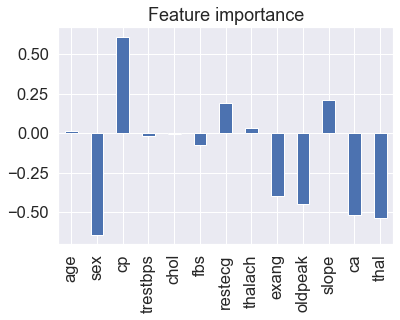

In [98]:
# Visualize feature importance
feature_df = pd.DataFrame(feature_dict, index=[0])
feature_df.T.plot.bar(title="Feature importance", legend=False);


In [99]:
pd.crosstab(df["sex"], df["target"])

target,0,1
sex,,
0,24,72
1,114,93


In [100]:
pd.crosstab(df["slope"], df["target"])

target,0,1
slope,,
0,12,9
1,91,49
2,35,107


## 6.Experimentation
If you haven't hit your evaluation metric yrt... ask yourself...

* Could you collect more data?
* Could you try a better model? Like CatBoost or XGBoost?
* Could you improve the current models? (beyond what we've done so far)
* If your model is good enough (you have hit your evaluation metric) we can save export model and share with others.
                                         